# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import fixed

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    sns.set(rc={'figure.figsize':(14,7)})
    sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(rc={'figure.figsize':(18,9)})

## 0.2 Loading Data

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

# 1.0  Data Description

## 1.1 Variables Dictionary 

**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## 1.2 Data Types

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.3 Change variable type

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['sqft_living'] = df['sqft_living'].astype(float)
df['sqft_lot'] = df['sqft_lot'].astype(float)
df['sqft_above'] = df['sqft_above'].astype(float)
df['sqft_basement'] = df['sqft_basement'].astype(float)

## 1.4 Checking Nan values

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.5 Descriptive Statistical

In [7]:
# Central tendecy - mean, median
# Dispersion - std, min, max, skew, kurtosis

skew = df.skew()
kurt = df.kurtosis()

In [8]:
metrics = pd.DataFrame(df.describe().drop(['count','25%', '75%']).T)
metrics = pd.concat([metrics, skew, kurt], axis=1)
metrics.columns = ['Mean','Std','Min','Median','Max','Skew','Kurtosis']
metrics

,Mean,Std,Min,Median,Max,Skew,Kurtosis
id,4580301520.865,2876565571.312,1000102.000,3904930410.000,9900000190.000,0.243,-1.261
price,540088.142,367127.196,75000.000,450000.000,7700000.000,4.024,34.586
bedrooms,3.371,0.930,0.000,3.000,33.000,1.974,49.064
bathrooms,2.115,0.770,0.000,2.250,8.000,0.511,1.280
sqft_living,2079.900,918.441,290.000,1910.000,13540.000,1.472,5.243
sqft_lot,15106.968,41420.512,520.000,7618.000,1651359.000,13.060,285.078
floors,1.494,0.540,1.000,1.500,3.500,0.616,-0.485
waterfront,0.008,0.087,0.000,0.000,1.000,11.385,127.632
view,0.234,0.766,0.000,0.000,4.000,3.396,10.893
condition,3.409,0.651,1.000,3.000,5.000,1.033,0.526


# 2.0 Data cleaning

## 2.1 Removing duplicate ID's 

In [9]:
df['id'].value_counts()

795000620     3
3523069060    2
7129304540    2
2619920170    2
6021501535    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21436, dtype: int64

In [10]:
df['id'].nunique()

21436

In [11]:
df.drop_duplicates(subset=['id'], inplace=True, keep='first')

In [12]:
df.shape

(21436, 21)

## 2.2 Droping unused columns

In [13]:
df.drop(['sqft_living15', 'sqft_lot15'], inplace=True, axis=1)

## 2.3 Checking Outliers

<AxesSubplot:xlabel='price'>

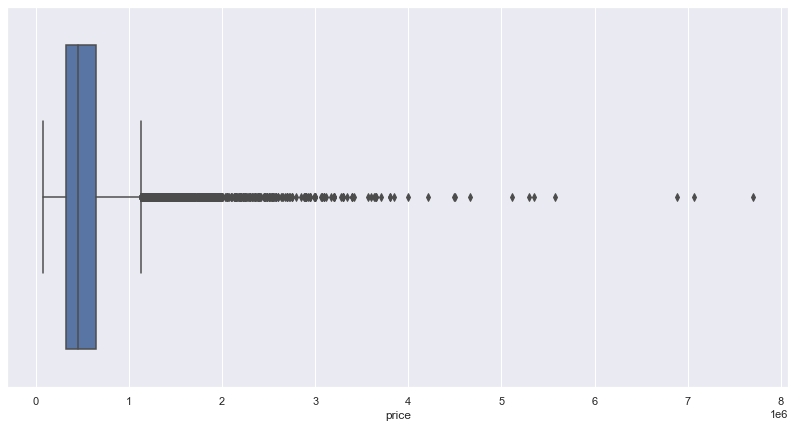

In [14]:
plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
sns.boxplot(df['price'])

Verifica-se a presença de outliers na variavel preço, porem no calculo do preço medio esses valores acabam não tendo influencia
pois se encontram em apenas uma pequena quantidade dos dados

# 3.0 Feature Engineering

## 3.1 Hypotheses List

**H1: Imóveis que possuem vista para água, são 30% mais caros, na média.**

**H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.**

**H3: Imóveis sem porão possuem sqrt_lot, são 50% maiores do que com porão.**

**H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%**

**H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%**

**H6: Imóveis com 3 ou mais banheiros são 30% mais caros, na média**

**H7: Imóveis com condition igual ou maior do que 4 são 40% mais caros, na média**

**H8: Imóveis vendidos no inverno são 30% mais baratos na média do que imóveis vendidos no verão**

**H9: Imóveis com mais de 400m2 (m2_living) são 50% mais caros na media**

**H10: Imóveis com menos de 100m2 tem um crescimento Mom ( Month over Month ) de 20%**

**H11: Imóveis com 4 ou mais quartos são 50% mais caros, na média**

## 3.2 Feature Engineering

In [15]:
# converting sqft to m2

df['m2_living'] = df['sqft_living'].apply(lambda x: x*0.09290304)
df['m2_lot'] = df['sqft_lot'].apply(lambda x: x*0.09290304)
df['m2_basement'] = df['sqft_basement'].apply(lambda x: x*0.09290304)
df['m2_above'] = df['sqft_above'].apply(lambda x: x*0.09290304)

In [16]:
# spliting date

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['week_of_year'] = df['date'].dt.isocalendar().week

# 4.0 Business Questions

## 4.1 Quais são os imóveis que a House Rocket deveria comprar e por qual preço ?

- Coletar os dados do site do Kaggle.
- Agrupar os imóveis por região ( zipcode ).
- Dentro de cada região, eu vou encontrar a mediana do preço do imóvel.
- Sugerir os imóveis que estão abaixo do preço mediano da região e que estejam e boas condições.


In [17]:
df2 = pd.DataFrame(df[['zipcode','price']].groupby('zipcode').median().reset_index())
df2.columns = ['zipcode', 'median_price']

In [18]:
data = pd.merge(df,df2, on='zipcode', how='inner')

In [19]:
data['buy'] = 'NA'
data['buy'] = data[['price','median_price', 'condition',]].apply(lambda x: 'yes' if (x['price'] < x['median_price']) & (x['condition'] >= 4) else 'no', axis=1)

In [20]:
df_sugestion = data[['id','zipcode','price','median_price','condition','buy']].copy()
df_sugestion.sample(10)

,id,zipcode,price,median_price,condition,buy
7891,7436900060,98052,440000.000,615000.000,3,no
7773,1025059181,98052,480000.000,615000.000,3,no
4982,7787920180,98019,534950.000,401250.000,3,no
11012,8731990440,98023,299900.000,268750.000,4,no
2990,5104512070,98038,412000.000,342000.000,3,no
8893,2880100240,98117,439950.000,542500.000,5,yes
6631,1683600130,98092,245000.000,309780.000,4,yes
11106,2817100900,98070,256500.000,465000.000,4,yes
12317,8563010130,98008,1300000.000,545000.000,3,no
6316,5452301785,98040,2298000.000,993750.000,3,no


In [103]:
#df_sugestion.to_csv('data/df_sugestions01.csv', index=False)

In [21]:
buy_bar = widgets.Dropdown( 
    options= data['buy'].unique().tolist(), 
    value='yes', 
    description='Buy', 
    disable=False)

def update_map(data, buy):
    houses = data[data['buy'] == buy][['id','zipcode','price','median_price','condition','buy', 'lat', 'long']]
    fig = px.scatter_mapbox( houses, 
                         lat="lat", 
                         lon="long", 
                         color="median_price",  
                         size="price",   
                         color_continuous_scale=px.colors.cyclical.IceFire, 
                         size_max=15, 
                         zoom=10)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [22]:
widgets.interactive( update_map, data=fixed( data ), buy=buy_bar)

interactive(children=(Dropdown(description='Buy', index=1, options=('no', 'yes'), value='yes'), Output()), _do…

## 4.2 Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço ?

- Como os dados já tratados e organizados.
- Agrupar os imóveis por região ( zipcode ) e por sazonalidade ( Summer, Winter ).
- Dentro de cada região e sazonalidade, calcular a mediana do preco.
- Condições de venda:
     
     Se o preço da compra for maior que a mediana da região + sazonalidade.
            O preço da venda será igual ao preço da compra + 10%
	 Se o preço da compra for menor que a mediana da região + sazonalidade.
			O preço da venda será igual ao preço da compra + 30%


In [23]:
data['season'] = 'na'

data['season'] = data['week_of_year'].apply(lambda x: 'summer' if (x >= 25) & (x <= 38) 
                                            else 'fall' if (x >= 39) & (x <= 50) 
                                            else 'spring' if (x > 11) & (x<= 24) 
                                            else 'winter')

In [24]:
# grouping by zipcode & season
df3 = data[['price','zipcode','season']].groupby(['zipcode','season']).median().reset_index()
df3.columns = ['zipcode', 'season','season_median_price']

In [25]:
data = pd.merge(data,df3, on=['zipcode','season'], how='inner')

In [26]:
data['sell_price'] = data[['season_median_price','price']].apply(lambda x: (x['price']*0.1 + x['price']) if x['price'] >= x['season_median_price'] else (x['price']*0.3 + x['price']), axis=1)
data['profit'] = data[['sell_price','price']].apply(lambda x: x['sell_price'] - x['price'], axis=1)

In [112]:
df_sugestions02 = data[['id', 'zipcode', 'season','season_median_price','price','sell_price','profit']]
df_sugestions02.head()

,id,zipcode,season,season_median_price,price,sell_price,profit
0,7129300520,98178,fall,287000.000,221900.000,288470.000,66570.000
1,2976800796,98178,fall,287000.000,236000.000,306800.000,70800.000
2,1180002378,98178,fall,287000.000,299000.000,328900.000,29900.000
3,1180500070,98178,fall,287000.000,335000.000,368500.000,33500.000
4,179000350,98178,fall,287000.000,194000.000,252200.000,58200.000


In [105]:
#df_sugestions02.to_csv('data/df_sugestions02.csv', index=False)

# 5.0 EDA

## 5.1 Univariate Analysis

### 5.1.1 Response Variable

<AxesSubplot:xlabel='price', ylabel='Density'>

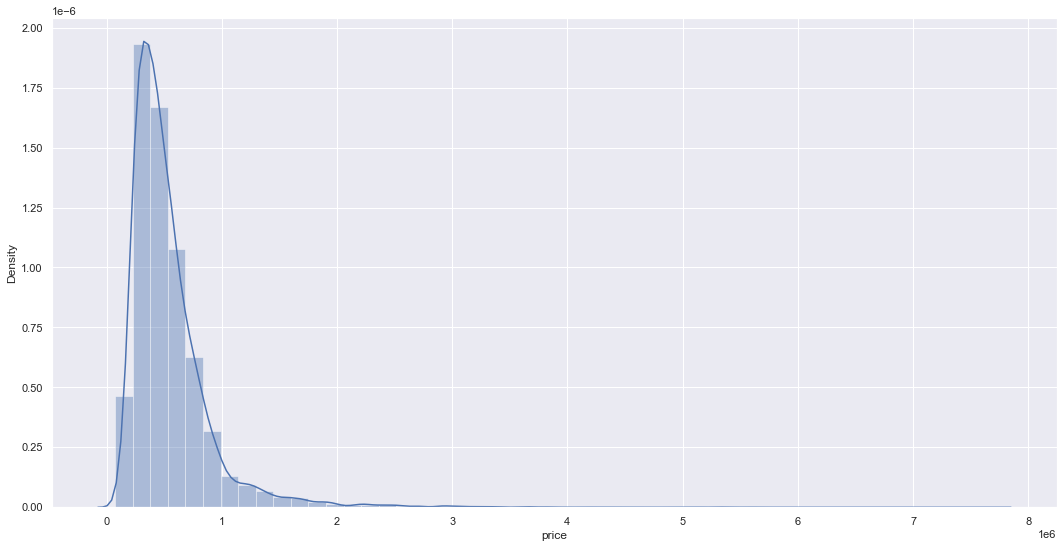

In [28]:
sns.distplot(data['price'])

### 5.1.2 Numerical Variable

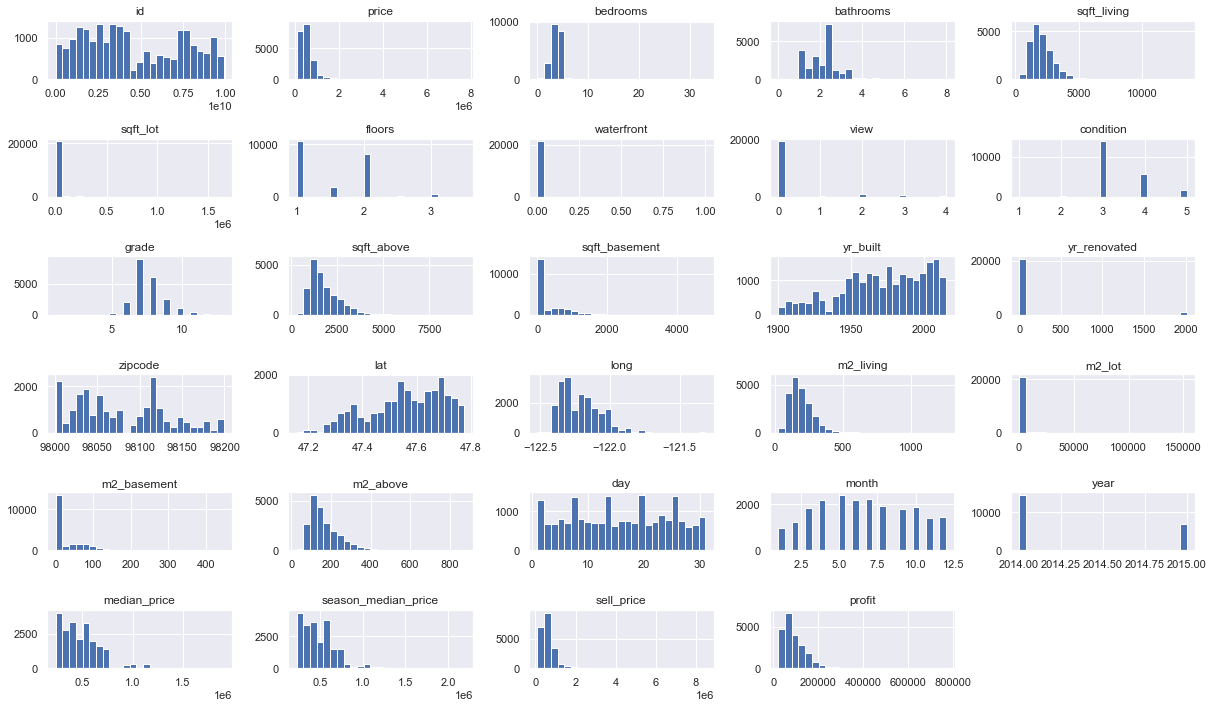

In [29]:
num_attributes = data.select_dtypes(include=['int64','float64','int32','float32'])

num_attributes.hist(figsize=(17,10), bins=25);
plt.tight_layout()

## 5.2 Bivariate Analysis

### **H1: Imóveis que possuem vista para água, são 30% mais caros, na média.**
**Falsa** Imóveis com vista para a agua são 200% mais caros na mádia

In [99]:
aux = data[['price','waterfront']].groupby('waterfront').mean().reset_index()

aux['growht'] = aux['price'].pct_change()

aux

,waterfront,price,growht
0,0,531937.198,NaN
1,1,1661876.025,2.124


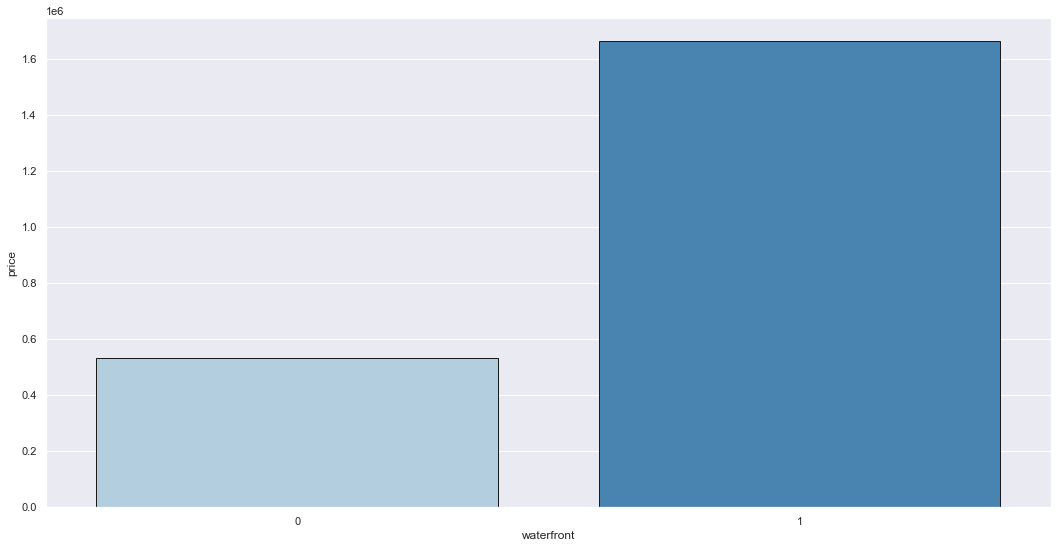

In [100]:
sns.barplot(x='waterfront',y='price',data=aux, edgecolor='k', palette='Blues');

### **H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.**
**Falsa** Imóveis com data de construção menot do que 1955 são aproximadamente 1,6% mais baratos

In [33]:
aux = data[['price','yr_built']].copy()

aux['yr_built'] = aux['yr_built'].apply(lambda x: '<= 1955' if x <= 1955 else '> 1955')

aux1 = aux[['price','yr_built']].groupby('yr_built').mean().reset_index()
aux1['growth'] = aux1['price'].pct_change()

aux1

,yr_built,price,growth
0,<= 1955,534369.352,NaN
1,> 1955,543126.772,0.016


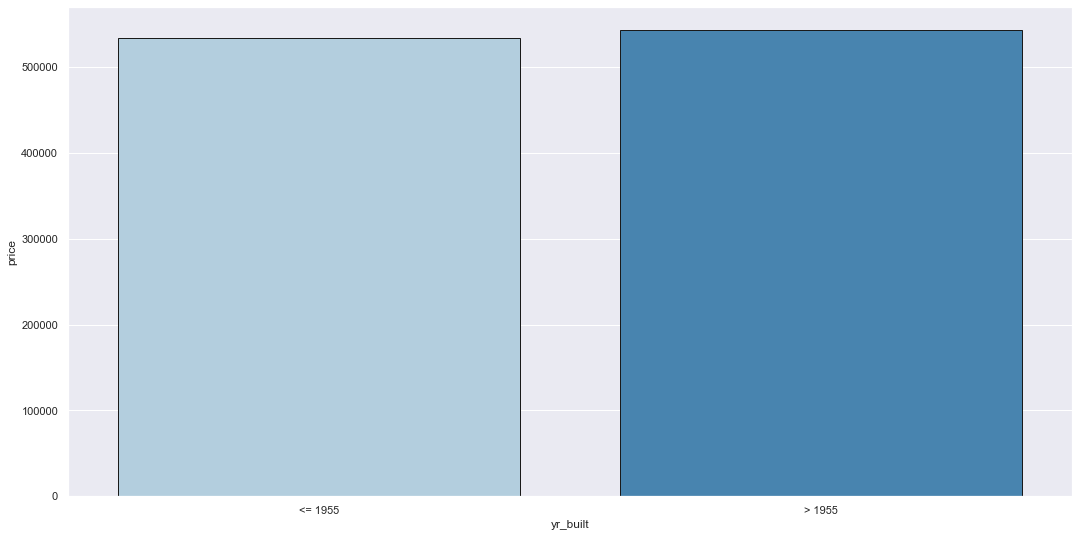

In [34]:
sns.barplot(x='yr_built', y='price', data=aux1, edgecolor='k', palette='Blues');

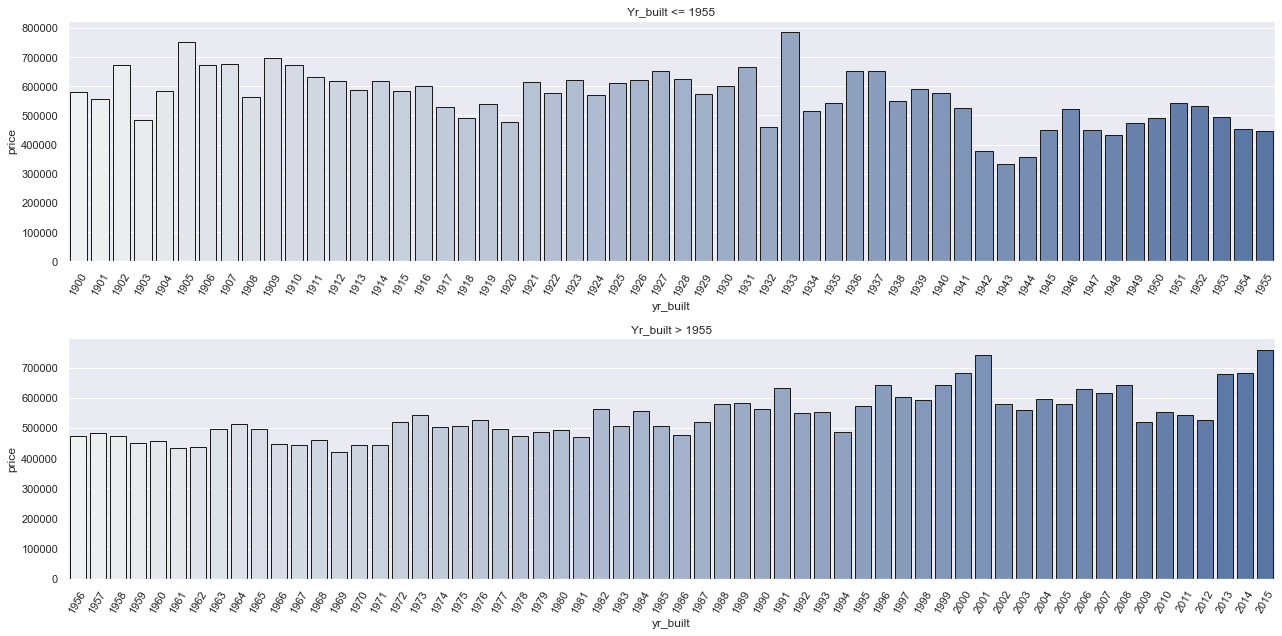

In [35]:
aux = data[['price','yr_built']].loc[data['yr_built'] <= 1955].groupby('yr_built').mean().reset_index()
aux2 = data[['price','yr_built']].loc[data['yr_built'] > 1955].groupby('yr_built').mean().reset_index()

plt.subplot(2,1,1)
sns.barplot(x='yr_built', y='price', data=aux, edgecolor='k', palette='light:b');
plt.xticks(rotation=60);
plt.title('Yr_built <= 1955')

plt.subplot(2,1,2)
sns.barplot(x='yr_built', y='price', data=aux2, edgecolor='k', palette='light:b');
plt.xticks(rotation=60);
plt.title('Yr_built > 1955')
plt.tight_layout()

### **H3: Imóveis sem porão possuem area total (sqrt_lot), são 50% maiores do que com porão.**
**Falsa** Imóveis sem porão possuem uma area total 23% maior

In [101]:
aux = data[['sqft_basement','sqft_lot']].copy()

aux['sqft_basement'] = aux['sqft_basement'].apply(lambda x: 'yes' if x != 0 else 'no')

aux1 = aux[['sqft_basement','sqft_lot']].groupby('sqft_basement').mean().reset_index()

aux1.sort_values(by='sqft_lot', ascending=True, inplace=True)

aux1['growth'] = aux1['sqft_lot'].pct_change()

aux1

,sqft_basement,sqft_lot,growth
1,yes,13295.995,NaN
0,no,16325.929,0.228


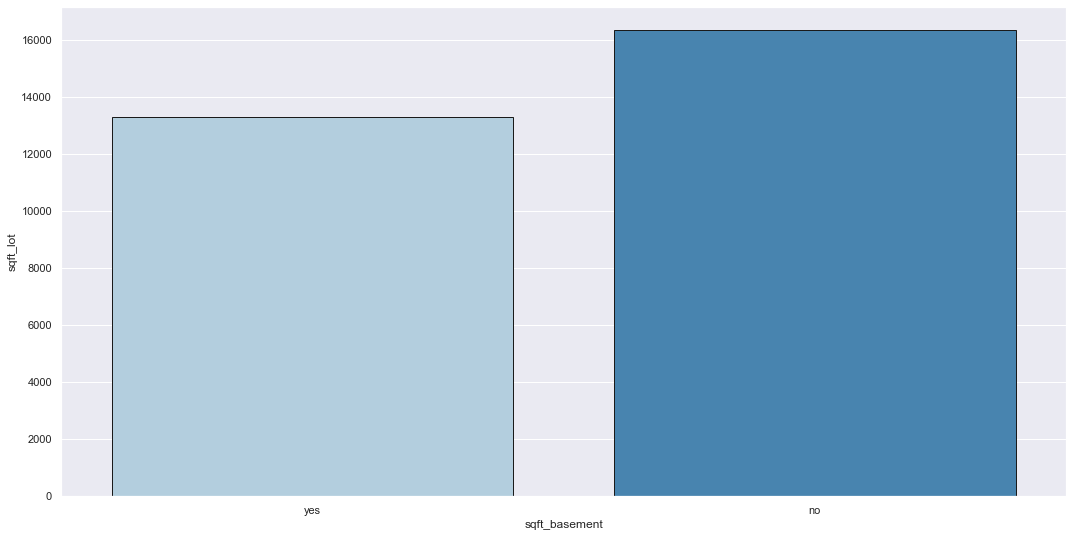

In [88]:
sns.barplot(x='sqft_basement',y='sqft_lot', data=aux1, edgecolor='k', palette='Blues');

### **H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%**
**Falsa** O crescimento do preço dos imoveis YoY é de 2%

In [97]:
# fazendo a comparação com o mes 5 de cada ano
aux = data[['price','year']].loc[data['month'] == 5].copy()

aux1 = aux[['price','year']].groupby('year').mean().reset_index()

aux1['growth'] = aux1['price'].pct_change()

aux1

,year,price,growth
0,2014,548080.277,NaN
1,2015,559563.460,0.021


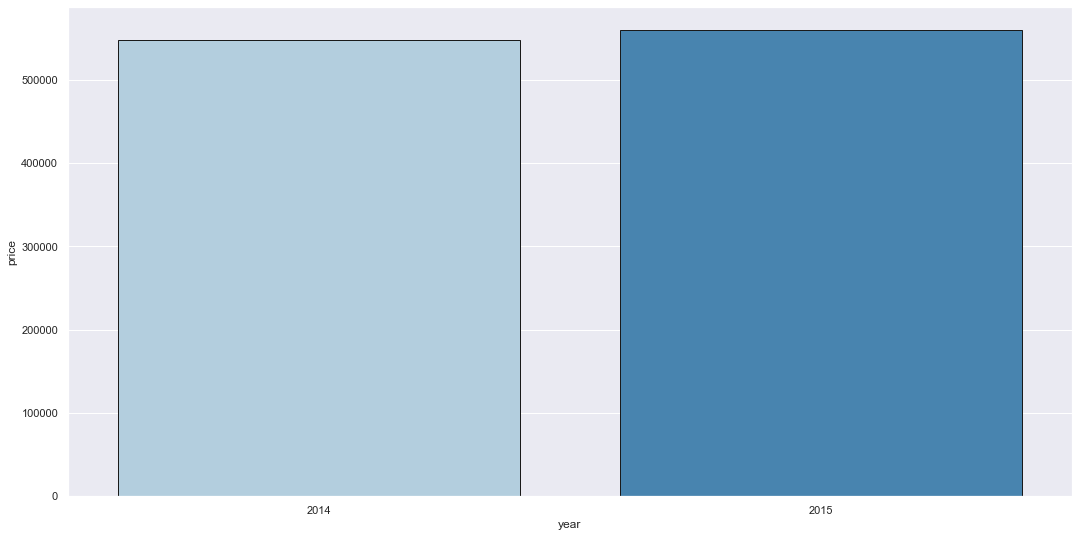

In [98]:
sns.barplot(x='year',y='price',data=aux1, edgecolor='k', palette='Blues');

### **H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%**
**Falsa** Imóveis com 3 banheiros não possuem um crescimento MoM de 15%

In [72]:
aux = data[['price','month']].loc[data['bathrooms'] == 3].groupby(['month']).mean().reset_index()
aux['growth'] = aux['price'].pct_change()

<AxesSubplot:xlabel='month', ylabel='growth'>

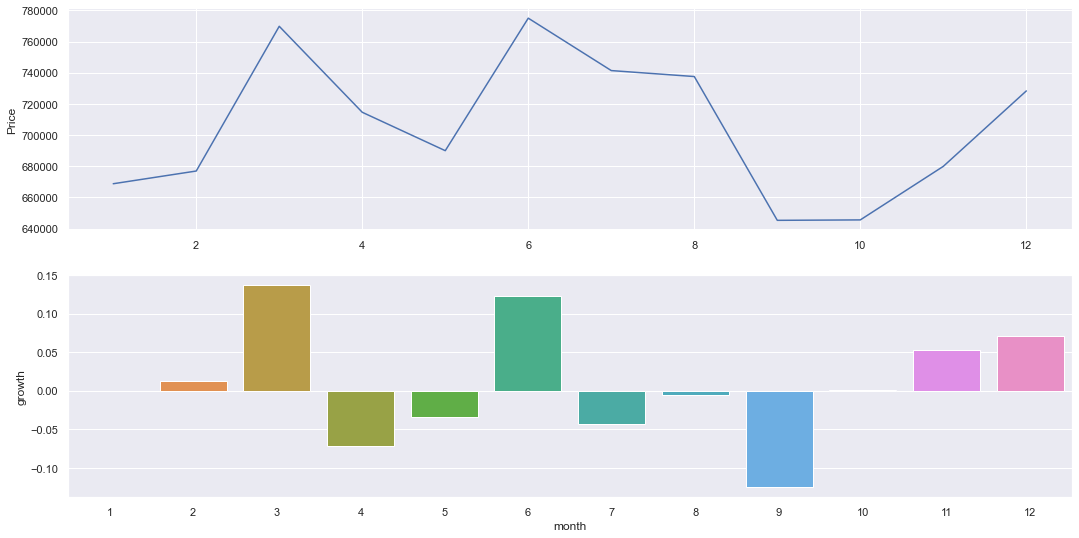

In [42]:
plt.subplot(2,1,1)
plt.plot('month','price', data=aux)
plt.ylabel('Price')

plt.subplot(2,1,2)
sns.barplot(x='month',y='growth', data=aux)

### H6: Imóveis com 3 ou mais banheiros são 30% mais caros, na média
**Falsa** Impoveis com 3 ou mais banheiros são 100% mais caros na média

In [69]:
aux = data[['bathrooms','price']].copy()

aux['bathrooms'] = aux['bathrooms'].apply(lambda x: '>= 3' if x >=3 else '< 3')

aux1= aux[['price','bathrooms']].groupby('bathrooms').mean().reset_index()

aux1['growth'] = aux1['price'].pct_change()

aux1

,bathrooms,price,growth
0,< 3,478799.818,NaN
1,>= 3,984622.794,1.056


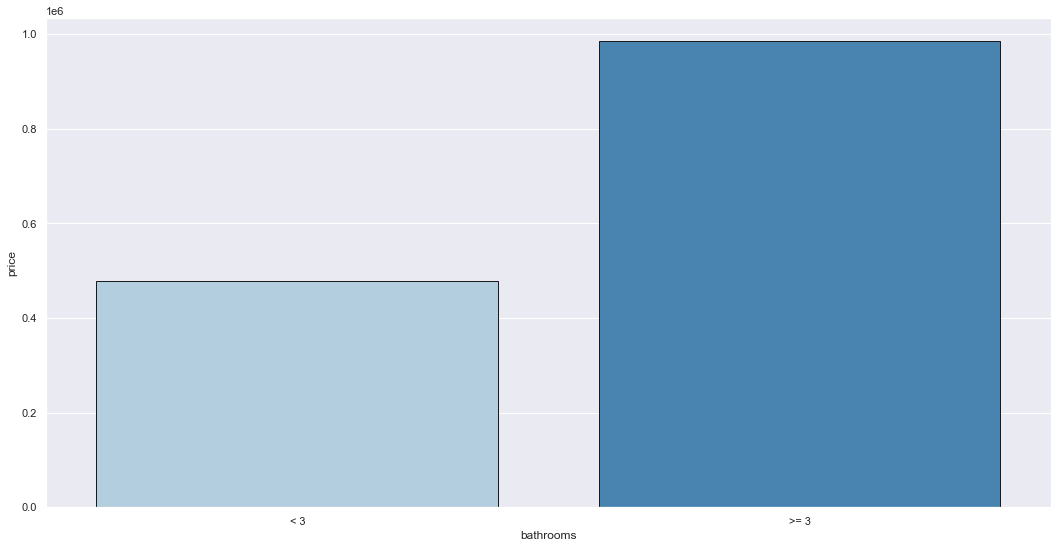

In [71]:
sns.barplot(x='bathrooms',y='price',data=aux1, edgecolor='k', palette='Blues');

### H7: Imóveis com condition igual ou maior do que 4 são 40% mais caros, na média
**Falsa** Imóveis com condition igual ou maior do que 4 são 0,5% mais caros, na média

In [74]:
aux = data[['price','condition']].copy()

aux['condition'] = aux['condition'].apply(lambda x: '< 4' if x < 4 else '>= 4')

aux1 = aux[['price','condition']].groupby('condition').mean().reset_index()

aux1['growth'] = aux1['price'].pct_change()

aux1

,condition,price,growth
0,< 4,539654.944,NaN
1,>= 4,542211.193,0.005


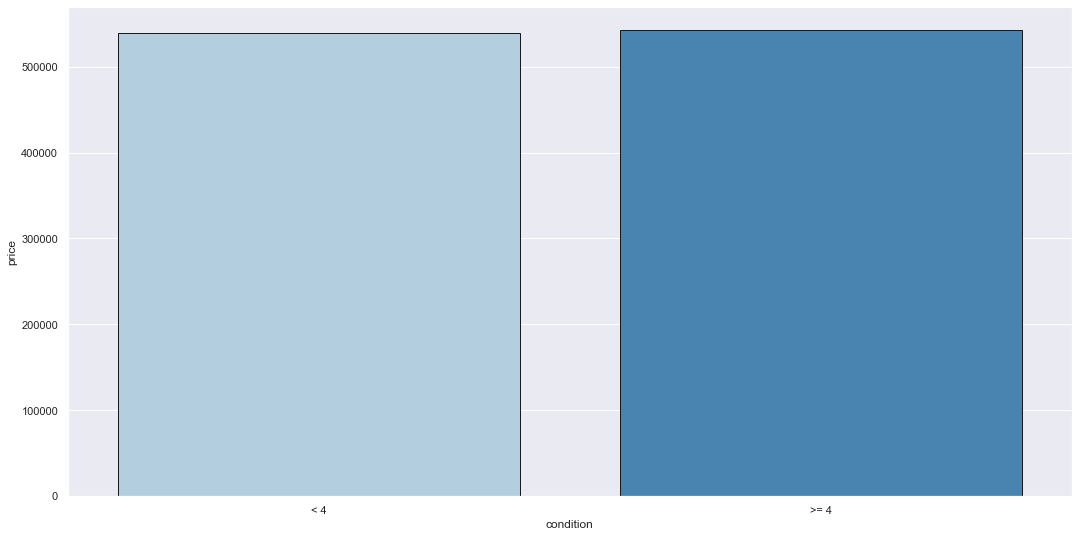

In [75]:
sns.barplot(x='condition',y='price', data=aux1, edgecolor='k', palette='Blues');

### H8: Imóveis vendidos no inverno são 30% mais baratos na média do que imóveis vendidos no verão
**Falsa** Imóveis vendidos no inverno são 4% mais baratos na média do que imóveis vendidos no verão

In [85]:
aux = data[['price','season']].loc[(data['season'] == 'winter') | (data['season'] == 'summer') ].copy()

aux1 = aux[['price','season']].groupby('season').mean().reset_index()

aux1.sort_values(by='price', ascending=True, inplace=True)

aux1['growth'] = aux1['price'].pct_change()

aux1

,season,price,growth
1,winter,521698.692,NaN
0,summer,543519.212,0.042


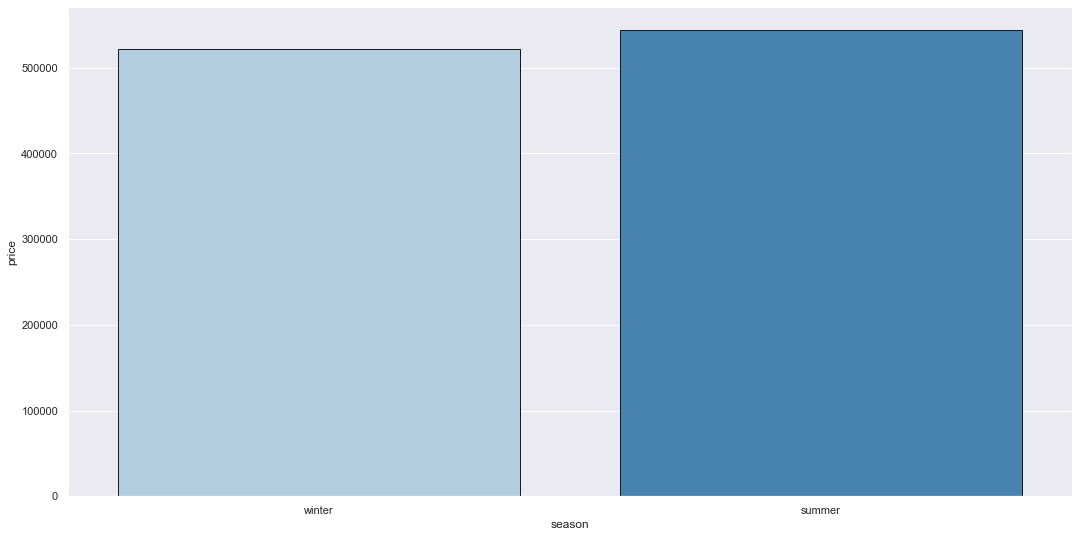

In [86]:
sns.barplot(x='season',y='price',data=aux1, edgecolor='k', palette='Blues');

### H9: Imóveis com mais de 400m2 (m2_living) são 50% mais caros na media
**Falsa** Imóveis com mais de 400m2 são 230% mais caros na média

In [91]:
aux = data[['price','m2_living']].copy()

aux['m2_living'] = aux['m2_living'].apply(lambda x: '< 400' if x < 400 else '> 400')

aux1= aux[['price','m2_living']].groupby('m2_living').mean().reset_index()

aux1['growth'] = aux1['price'].pct_change()

aux1

,m2_living,price,growth
0,< 400,512559.790,NaN
1,> 400,1688156.147,2.294


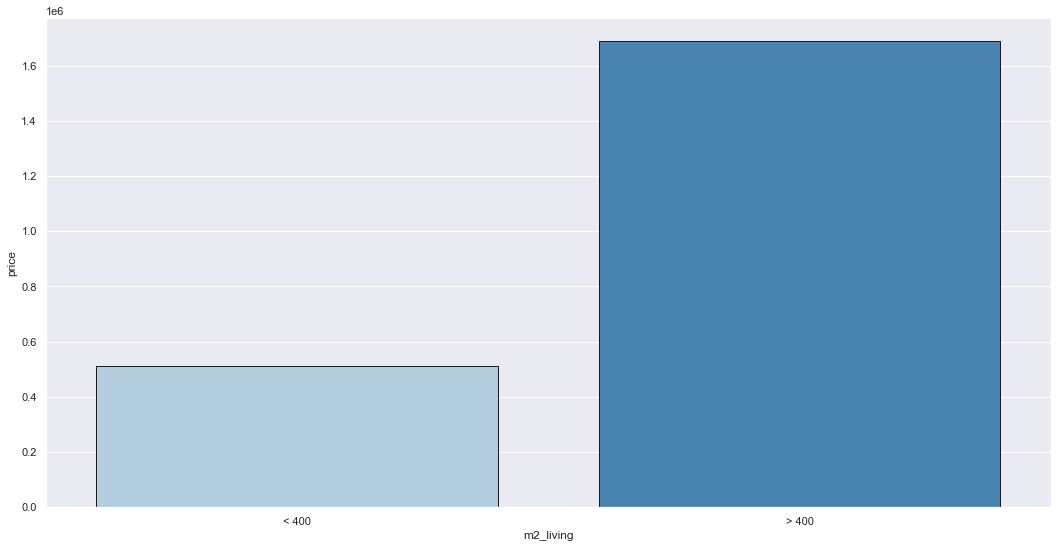

In [92]:
sns.barplot(x='m2_living',y='price', data=aux1, edgecolor='k', palette='Blues');

### H10: Imóveis com menos de 100m2 tem um crescimento Mom ( Month over Month ) de 20%
**Falsa** Imóveis com menos de 100m2 não possuem um crescimento MoM de 20%

In [55]:
aux = data[['price','month']].loc[data['m2_living'] < 100 ].groupby('month').mean().reset_index()
aux['growth'] = aux['price'].pct_change()

<AxesSubplot:xlabel='month', ylabel='growth'>

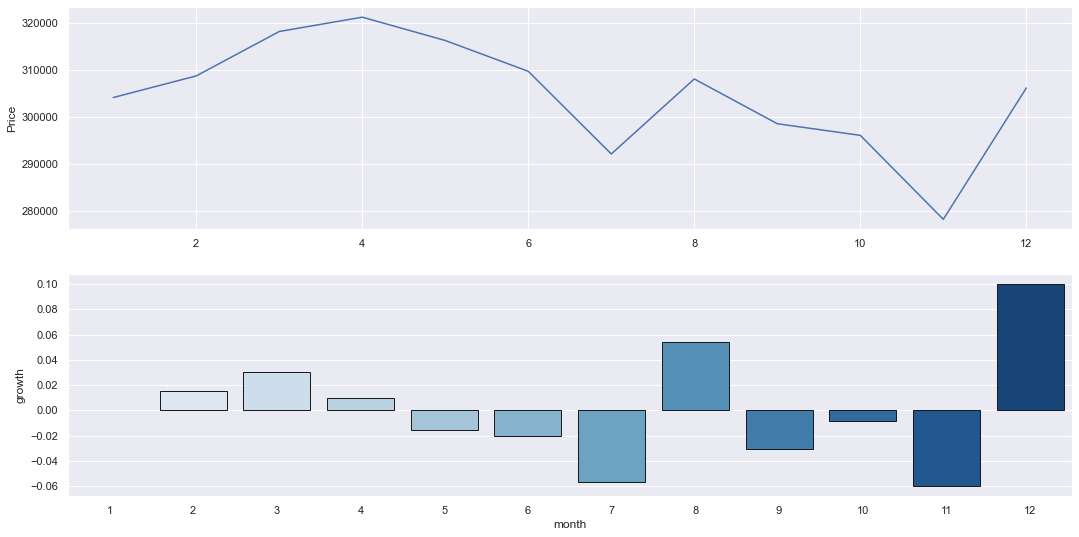

In [56]:
plt.subplot(2,1,1)
plt.plot('month','price', data=aux)
plt.ylabel('Price')

plt.subplot(2,1,2)
sns.barplot(x='month',y='growth', data=aux,  edgecolor='k', palette='Blues')

### H11: Imóveis com 4 ou mais quartos são 50% mais caros, na média
**Verdadeira** Imóveis com 4 ou mais quartos são 50% mais caros, na média

In [94]:
aux = data[['bedrooms','price']].copy()

aux['bedrooms'] = aux['bedrooms'].apply(lambda x: '< 4' if x < 4 else '>= 4')

aux1= aux[['price','bedrooms']].groupby('bedrooms').mean().reset_index()

aux1['growth'] = aux1['price'].pct_change()

aux1

,bedrooms,price,growth
0,< 4,449994.271,NaN
1,>= 4,671485.781,0.492


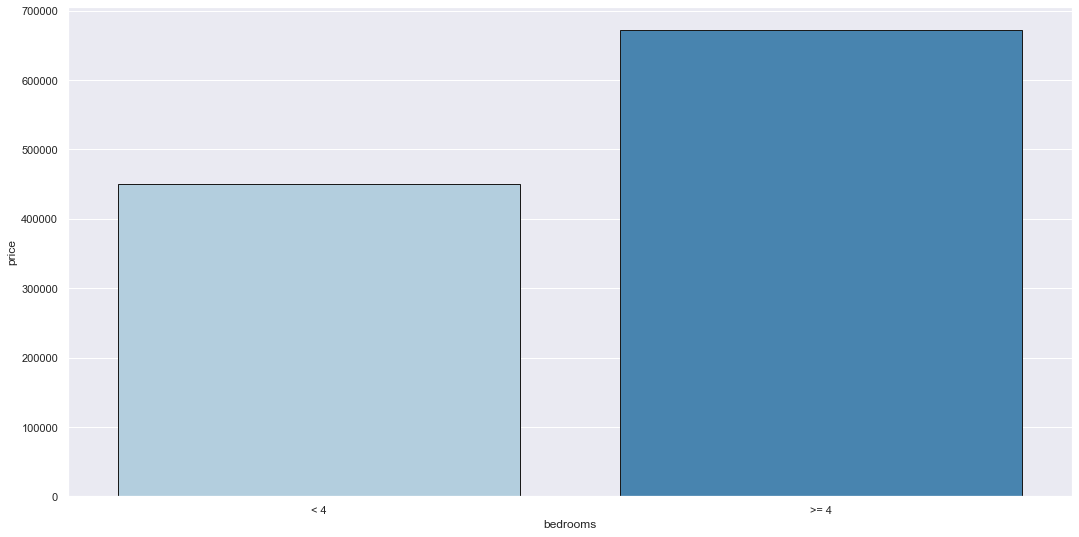

In [95]:
sns.barplot(x='bedrooms',y='price',data=aux1, edgecolor='k', palette='Blues');

## 5.3 Multivariate Analysis

<AxesSubplot:>

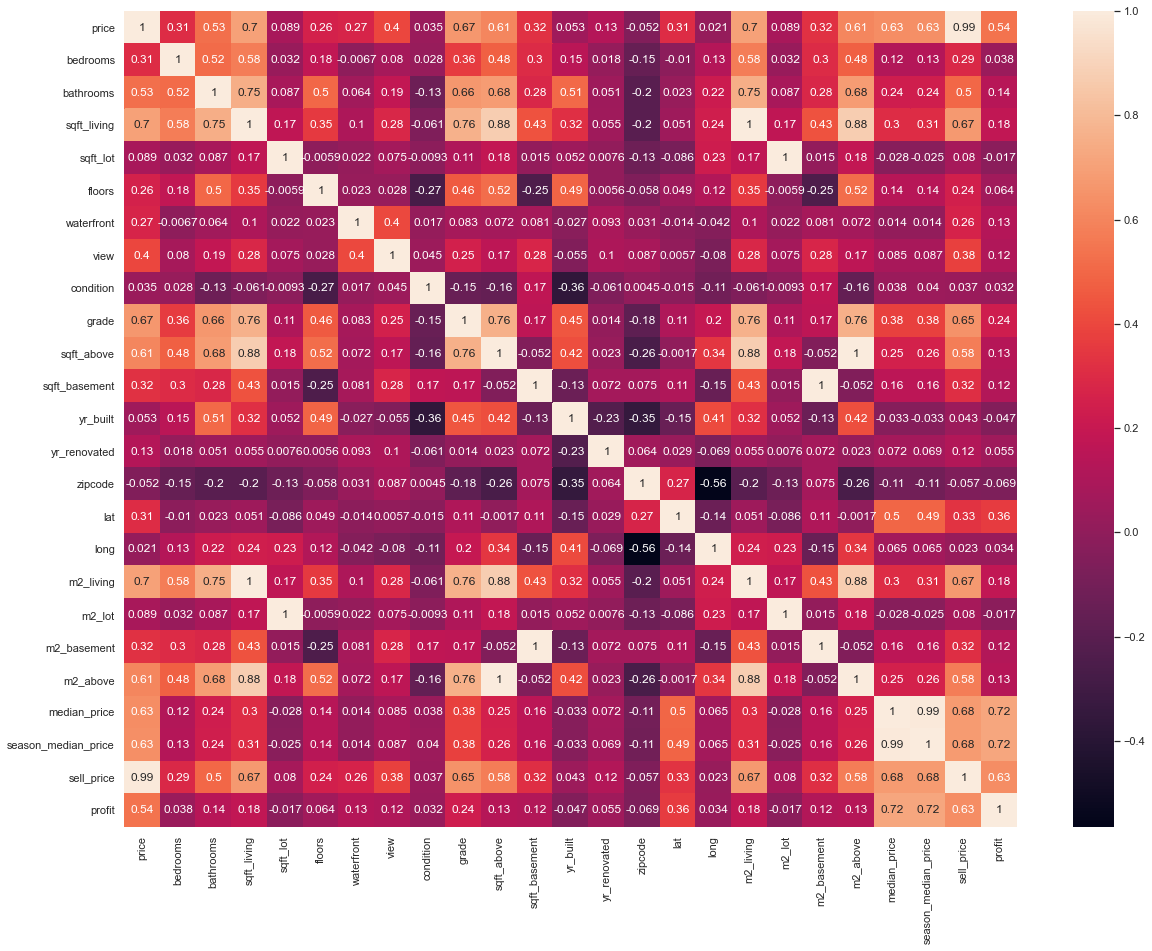

In [81]:
num_attributes = num_attributes.drop(['id','year','day','month'], axis=1)
correlation = num_attributes.corr(method='pearson')
plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot=True)